In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('library.csv') 

In [3]:
df.shape

(200, 10)

In [4]:
df.head()

,Book_ID,Title,Author,Category,Cabinet,Rack,Row,Signal_Strength,Timestamp,Status
0,B001,The Adventures of Chronicles,Jordan Brown,Programming,4,5,4,-59,2024-12-11 10:01:00,Present
1,B002,The Dream of Shadows,Taylor Walker,History,3,3,5,-42,2024-12-11 10:02:00,Missing
2,B003,The Shadows of Mystery,Jordan Johnson,Science,5,3,4,-47,2024-12-11 10:03:00,Checked Out
3,B004,The Chronicles of Dream,Casey Walker,Fiction,4,1,1,-60,2024-12-11 10:04:00,Missing
4,B005,The Future of Adventures,Skyler Lee,Programming,3,4,2,-58,2024-12-11 10:05:00,Missing


In [5]:
df.tail()

,Book_ID,Title,Author,Category,Cabinet,Rack,Row,Signal_Strength,Timestamp,Status
195,B196,The Journey of Journey,Taylor Clark,Programming,4,1,1,-59,2024-12-11 13:16:00,Checked Out
196,B197,The Future of Adventures,Alex Anderson,Thriller,3,4,5,-40,2024-12-11 13:17:00,Missing
197,B198,The Chronicles of Quest,Dakota Brown,Thriller,4,1,4,-42,2024-12-11 13:18:00,Present
198,B199,The Journey of Adventures,Jordan Johnson,History,2,1,1,-53,2024-12-11 13:19:00,Present
199,B200,The Dream of Code,Riley Smith,Fiction,5,1,5,-57,2024-12-11 13:20:00,Checked Out


In [7]:
from sklearn.preprocessing import StandardScaler
df['Category'] = df['Category'].astype('category').cat.codes  # Label encode Category
df['Status'] = df['Status'].astype('category').cat.codes  # Label encode Status

# Select numerical columns for clustering
features = df[['Cabinet', 'Rack', 'Row', 'Signal_Strength', 'Category', 'Status']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)

# Silhouette Score for K-means
kmeans_silhouette = silhouette_score(features_scaled, df['KMeans_Cluster'])
kmeans_davies_bouldin = davies_bouldin_score(features_scaled, df['KMeans_Cluster'])
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-means Davies-Bouldin Index: {kmeans_davies_bouldin:.4f}")


K-means Silhouette Score: 0.1319
K-means Davies-Bouldin Index: 2.0367


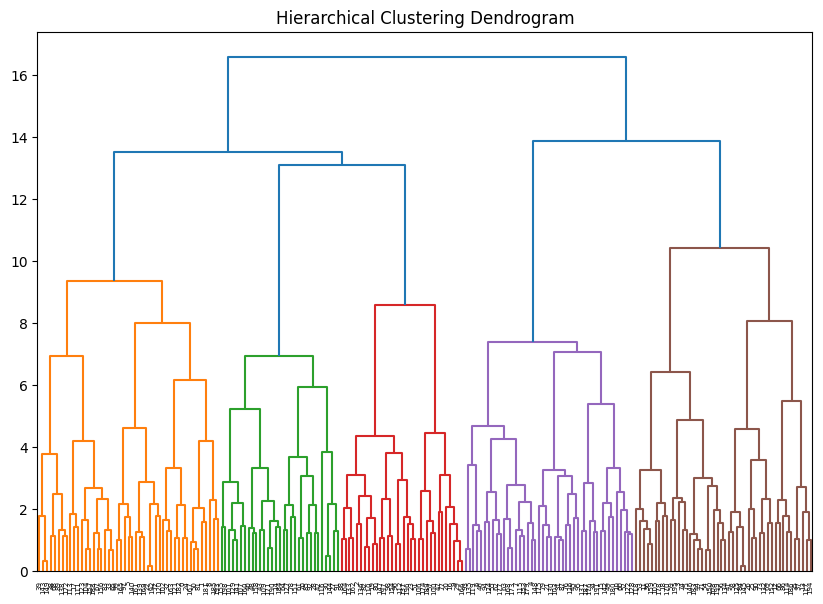

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(features_scaled, method='ward')  # Ward method minimizes variance
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [15]:
from sklearn.cluster import KMeans, DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)

# Silhouette Score for DBSCAN (only for non-noise points)
dbscan_silhouette = silhouette_score(features_scaled, df['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)
df['PCA1'], df['PCA2'] = pca_components[:, 0], pca_components[:, 1]

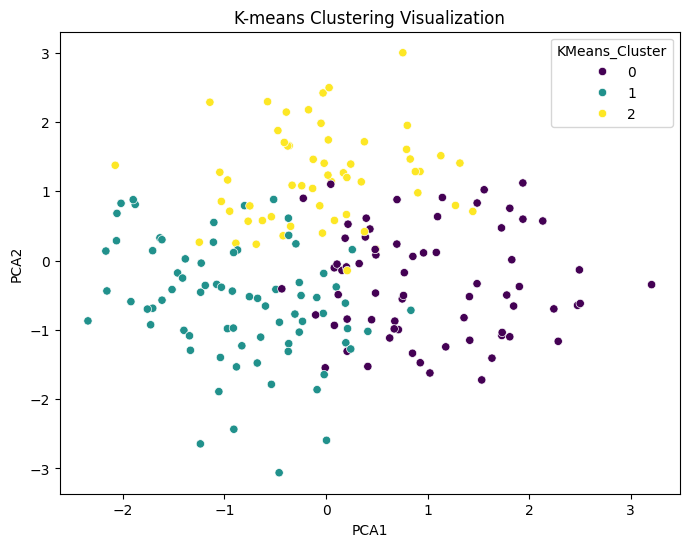

In [17]:
# Plotting K-means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-means Clustering Visualization')
plt.show()

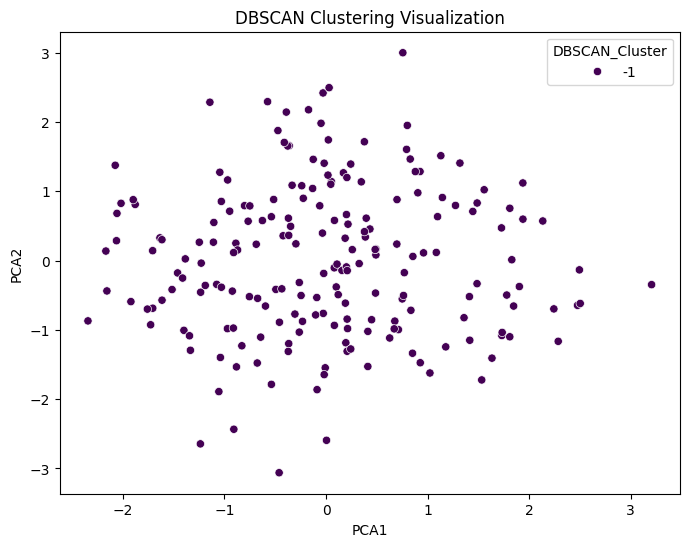

In [18]:
# Plotting DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering Visualization')
plt.show()